# Spaceship Titanic

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

The description of the data is given as below

1. `PassengerId` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

2.  `HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.

3. `CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

4. `Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

5. `Destination` - The planet the passenger will be debarking to.

6. `Age` - The age of the passenger.

7. `VIP` - Whether the passenger has paid for special VIP service during the voyage.

8. `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

9. `Name` - The first and last names of the passenger.
10. `Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [160]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [108]:
train_df = pd.read_csv("spaceship-titanic/train.csv")
test_df = pd.read_csv("spaceship-titanic/test.csv")
submission_df = pd.read_csv("spaceship-titanic/sample_submission.csv")

In [109]:
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [110]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [111]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [112]:
train_df.duplicated().sum(), test_df.duplicated().sum()

(0, 0)

So there are no duplicate entries for data in train and test dataframe

In [113]:
print("Datatypes of features of training data is:")
print(train_df.dtypes)

Datatypes of features of training data is:
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object


In [114]:
df1 = train_df.isnull().sum()[train_df.isnull().sum() > 0].to_frame().rename(columns={0:"Number of missing values"})
df1['% of missing values'] = round(train_df.isnull().sum()[train_df.isnull().sum() > 0] * 100 / len(train_df), 2)
df1

,Number of missing values,% of missing values
HomePlanet,201,2.31
CryoSleep,217,2.50
Cabin,199,2.29
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11


In [115]:
train_df.drop(['Name', 'Cabin'], axis=1, inplace=True)
test_df.drop(['Name', 'Cabin'], axis=1, inplace=True)

In [249]:
input_features = list(train_df.columns[1:-1])
target = 'Transported'

In [117]:
input_features

['HomePlanet',
 'CryoSleep',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck']

Text(0.5, 1.0, 'Target Distribution')

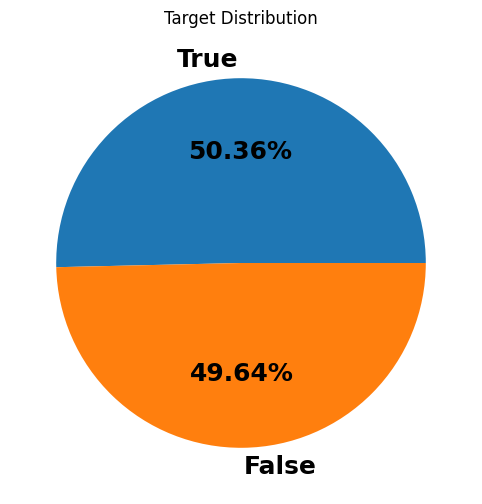

In [118]:
plt.figure(figsize=(10,6))
plt.pie(train_df['Transported'].value_counts(), labels=train_df['Transported'].value_counts().keys(),autopct="%1.2f%%", textprops={"fontsize":18, "fontweight":"black"})
plt.title("Target Distribution")

Percentage of transported : 50.36% <br>
Percentage of not transported : 49.64% <br>
It looks like that Target feature is highly balanced.

<Axes: xlabel='Age', ylabel='Count'>

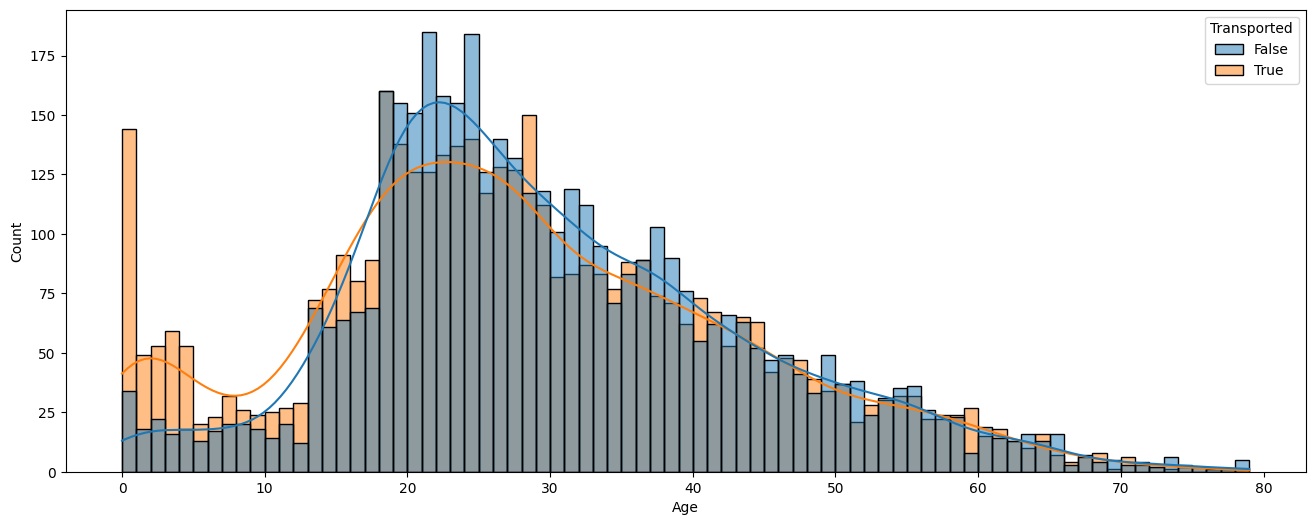

In [119]:
plt.figure(figsize=(16,6))
sns.histplot(data=train_df, x='Age', hue='Transported', kde=True,binwidth=1)

- 0-18 year olds were more likely to be transported than not.
- 18-25 year olds were less likely to be transported than not.
- Over 25 year olds were about equally likely to be transported than not.

In [120]:
train_df.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Transported        2
dtype: int64

In [121]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 755.7+ KB


In [122]:
categorical_cols = [col for col in input_features if train_df[col].nunique() < 25]
numerical_cols = [col for col in input_features if col not in categorical_cols]

In [123]:
len(categorical_cols)

4

<Axes: xlabel='HomePlanet', ylabel='Count'>

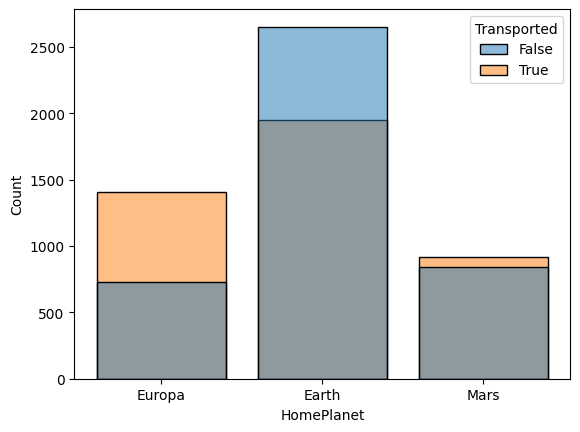

In [124]:
sns.histplot(data=train_df, x='HomePlanet', shrink=0.8, hue='Transported')

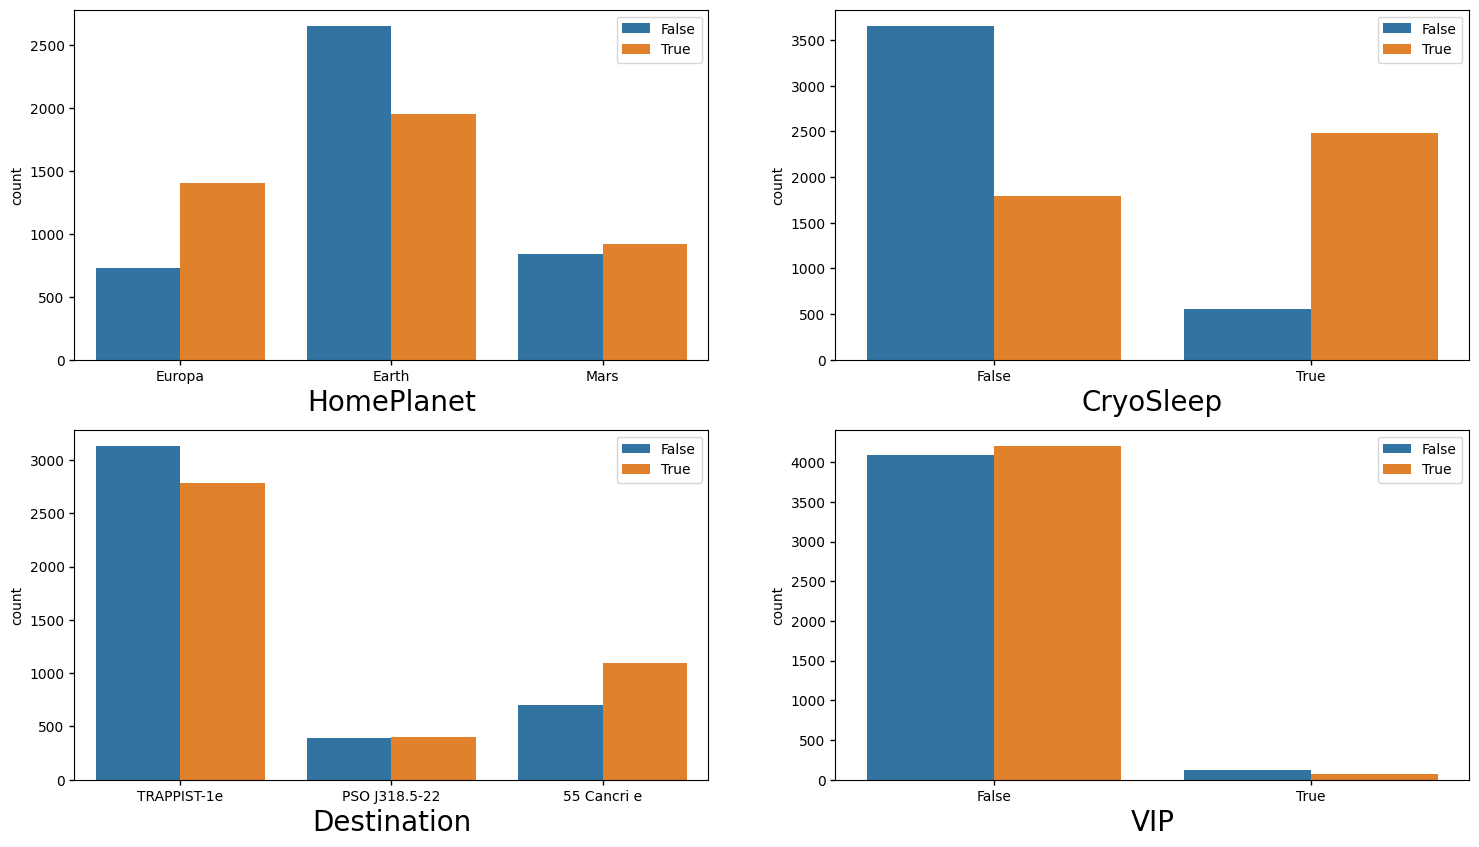

In [125]:
n_cols, n_rows = 2, 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18,10))
for i in range(n_rows):
    for j in range(n_cols):
        col = categorical_cols[n_cols*i + j]
        sns.countplot(train_df, x=col, hue='Transported',ax=axes[i,j])
        axes[i, j].legend()
        axes[i, j].set_xlabel(col, fontsize = 20)
        axes[i, j].tick_params(labelsize=10, width=1)





- In HomePlanet feature we can observe that most of passenger are from Earth but passenger from Earth are Comparatively Less Transported, passenger from Mars are Equally Transported, and passengers from Europa are Highly Transported.
- It looks that people in CryoSleep are transported to a large number.
-  In VIP feature we can observe that one cateogry is dominating other category too much. So it doesn't seem to be usefull feature because it can lead to overfitting in our model.
-  In Destination feature we can observe that most of the passengers are transported to Trappist-1e.

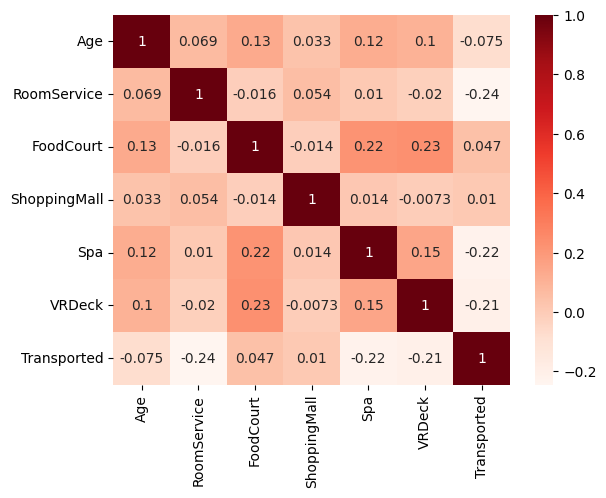

In [126]:
fig = sns.heatmap(train_df.corr(numeric_only=True), cmap='Reds', annot=True)

### Imputing Numeric columns

In [127]:
imputer = SimpleImputer(strategy="mean")
imputer.fit(train_df[numerical_cols])
train_df[numerical_cols] = imputer.transform(train_df[numerical_cols])
test_df[numerical_cols] = imputer.transform(test_df[numerical_cols])

In [128]:
train_df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


### Encoding Categorical cols

In [129]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(train_df[categorical_cols])

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [131]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'HomePlanet_nan', 'CryoSleep_False', 'CryoSleep_True', 'CryoSleep_nan', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Destination_nan', 'VIP_False', 'VIP_True', 'VIP_nan']


In [132]:
train_df[encoded_cols] = encoder.transform(train_df[categorical_cols])
test_df[encoded_cols] = encoder.transform(test_df[categorical_cols])


In [167]:
input_cols = numerical_cols + encoded_cols
input_cols

['Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'HomePlanet_Earth',
 'HomePlanet_Europa',
 'HomePlanet_Mars',
 'HomePlanet_nan',
 'CryoSleep_False',
 'CryoSleep_True',
 'CryoSleep_nan',
 'Destination_55 Cancri e',
 'Destination_PSO J318.5-22',
 'Destination_TRAPPIST-1e',
 'Destination_nan',
 'VIP_False',
 'VIP_True',
 'VIP_nan']

### Splitting dataset in train dataset and validation dataset for model training

In [250]:
X_train, X_val, Y_train, Y_val = train_test_split(train_df[numerical_cols+encoded_cols], train_df[target], test_size=0.3, random_state=42)

In [251]:
X_test = test_df[numerical_cols+encoded_cols]

### Training Random Forest model

In [252]:
model = RandomForestClassifier(random_state=42, n_jobs=-1)
model.fit(X_train, Y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [158]:
X_preds = model.predict(X_train)
accuracy_score(Y_train, X_preds)
# X_preds

0.9454396055875103

In [159]:
val_preds = model.predict(X_val)
accuracy_score(Y_val, val_preds)

0.7772239263803681

In [163]:
def predict_and_plot(inputs, targets, model, name):
    preds = model.predict(inputs)

    accuracy = accuracy_score(targets, preds)
    print(f"Accuracy: {accuracy:.2f}%")

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title(f"{name} Confusion Matrix")
    return preds
    

Accuracy: 0.95%


array([ True,  True, False, ..., False, False, False])

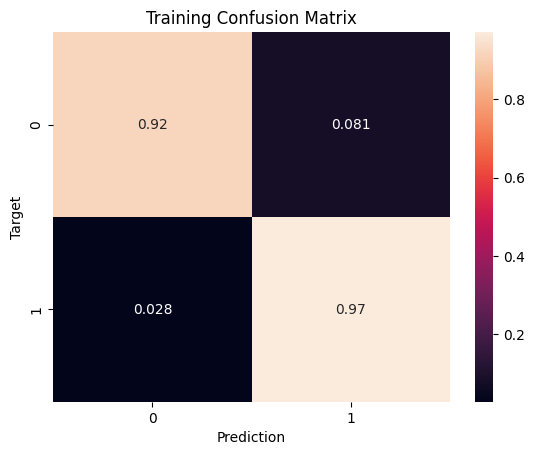

In [181]:
predict_and_plot(X_train, Y_train, model, "Training")

Accuracy: 0.78%


array([False,  True,  True, ..., False,  True, False])

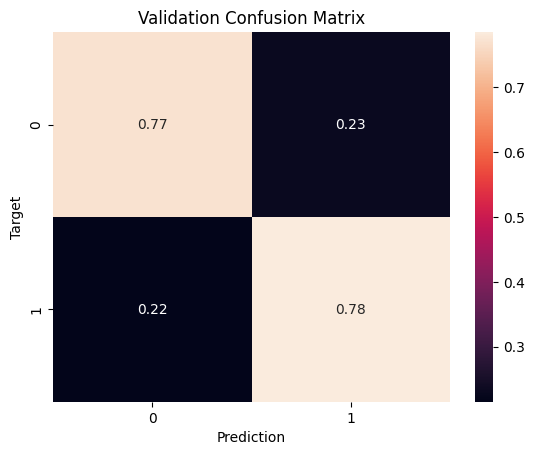

In [165]:
predict_and_plot(X_val, Y_val, model, "Validation")

In [166]:
def plot_feature_importance(input_cols, model):
    importance_df = pd.DataFrame({
    'feature': input_cols,
    'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    plt.title('Feature Importance')
    sns.barplot(data=importance_df.head(10), x='importance', y='feature')

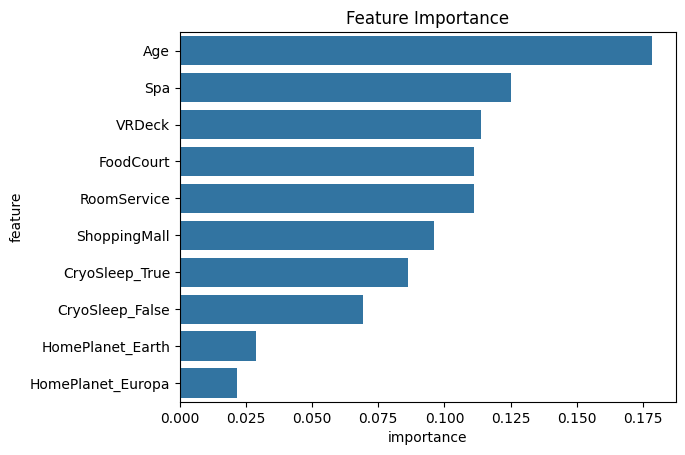

In [168]:
plot_feature_importance(input_cols, model)

In [173]:
def test_params(ModelClass, **params):
    """Trains a model with the given parameters and returns training & validation RMSE"""
    model = ModelClass(**params).fit(X_train, Y_train)
    train_rmse = accuracy_score(model.predict(X_train), Y_train)
    val_rmse = accuracy_score(model.predict(X_val), Y_val)
    return train_rmse, val_rmse

def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    """Trains multiple models by varying the value of param_name according to param_values"""
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_rmse, val_rmse = test_params(ModelClass, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

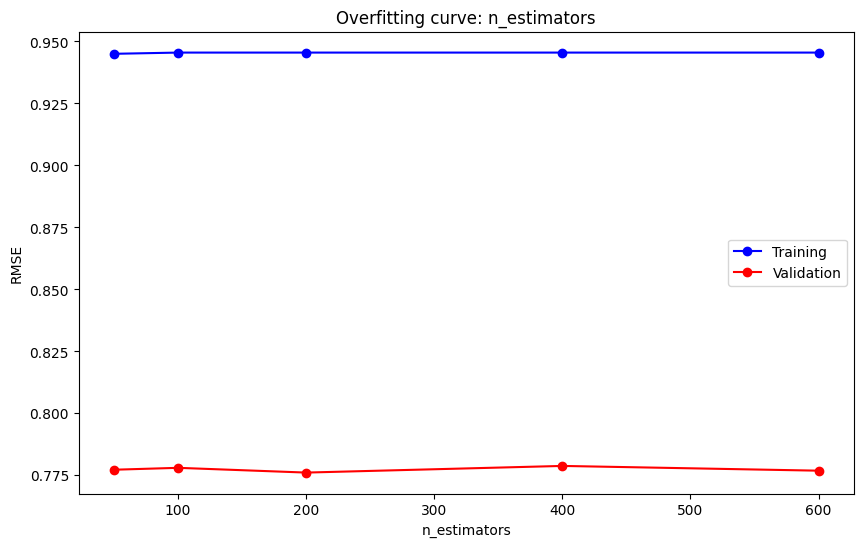

In [174]:
test_param_and_plot(RandomForestClassifier, 'n_estimators', [50,100,200,400,600])

In [176]:
best_params = {
    'random_state':42,
    'n_estimators':100,
    'n_jobs' : -1,
    'max_depth': 10
}

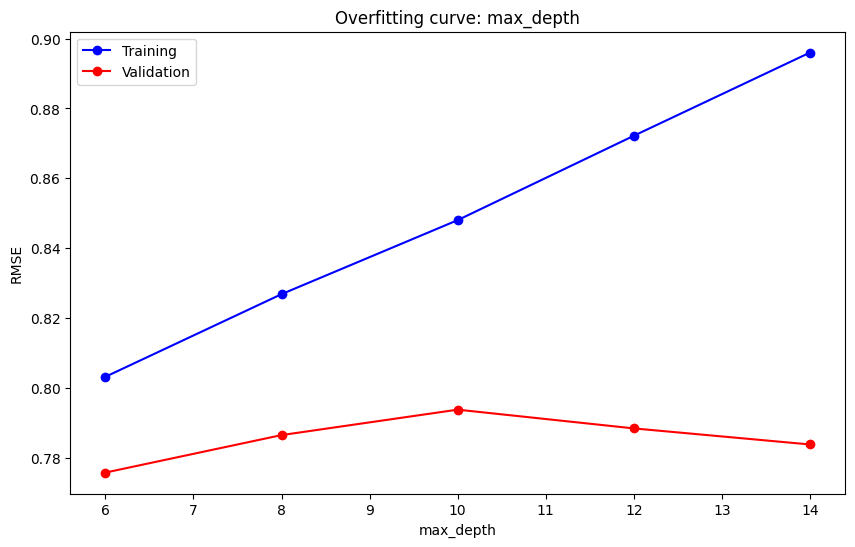

In [179]:
test_param_and_plot(RandomForestClassifier, 'max_depth', [6,8,10,12,14], **best_params )

In [182]:
model2 = RandomForestClassifier(random_state=42,
                                n_estimators=100,
                                max_depth=10,
                                n_jobs=-1)
model2.fit(X_train, Y_train)


RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

Accuracy: 0.85%


array([ True,  True, False, ..., False, False, False])

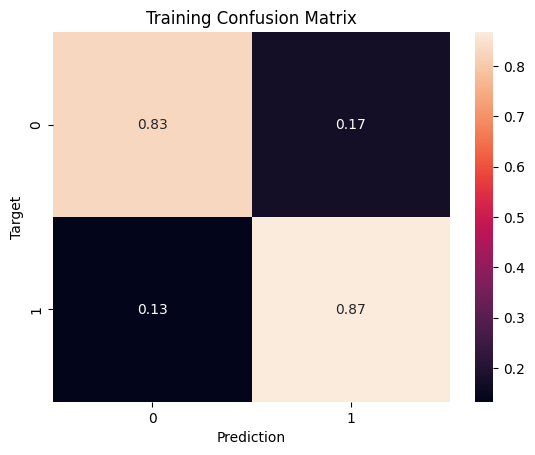

In [184]:
predict_and_plot(X_train, Y_train, model2,'Training')

Accuracy: 0.79%


array([False,  True,  True, ..., False,  True, False])

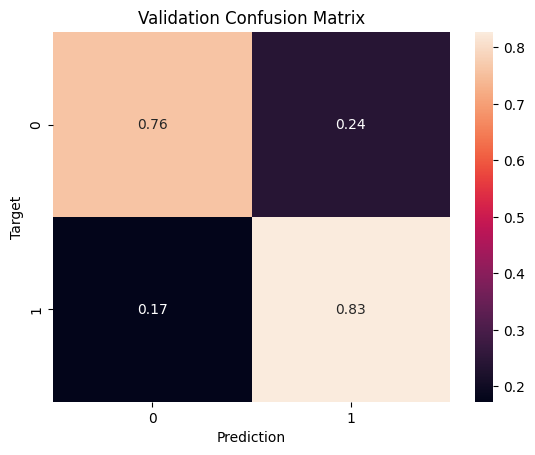

In [185]:
predict_and_plot(X_val, Y_val, model2, 'Validation')

In [187]:
submission_df

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [188]:
def predict_and_submit(model, fname):
    test_preds = model.predict(X_test)
    sub_df = submission_df
    sub_df['Transported'] = test_preds
    sub_df.to_csv(fname, index=None)
    return sub_df

In [189]:
predict_and_submit(model2, "Randomforest_sub.csv")

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


### Feature Engineering

In [191]:
X_train

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_nan,CryoSleep_False,CryoSleep_True,CryoSleep_nan,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_nan,VIP_False,VIP_True,VIP_nan
3032,43.0,0.0,1440.0,0.0,85.0,150.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7757,23.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1795,46.0,8.0,652.0,0.0,5.0,90.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1702,33.0,0.0,763.0,8.0,2.0,30.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6634,24.0,0.0,58.0,618.0,0.0,41.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,18.0,14.0,2.0,144.0,610.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5191,50.0,690.0,0.0,30.0,762.0,428.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5390,22.0,158.0,0.0,476.0,0.0,26.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
860,34.0,379.0,0.0,1626.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [192]:
# Combining all expenses passengers has done
X_train['TotalExpence'] = X_train['RoomService'] + X_train['FoodCourt'] + X_train['ShoppingMall'] + X_train['Spa'] + X_train['VRDeck']
X_val['TotalExpence'] = X_val['RoomService'] + X_val['FoodCourt'] + X_val['ShoppingMall'] + X_val['Spa'] + X_val['VRDeck']
X_test['TotalExpence'] = X_test['RoomService'] + X_test['FoodCourt'] + X_test['ShoppingMall'] + X_test['Spa'] + X_test['VRDeck']


C:\Users\HP\AppData\Local\Temp\ipykernel_27140\846453469.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [253]:
def get_passenger_grp(df, df1):
    df1['Group'] = df['PassengerId'].apply(lambda x: x.split('_')[0])
    df1['Member'] = df['PassengerId'].apply(lambda x: x.split('_')[1])

    x = df.groupby("Group")['Member'].count().sort_values()
    y = set(x[x>1].index)

    df1['Solo_treveler'] = df1['Group'].apply(lambda x: x not in y)

    df1['Group_size'] = 0
    for i in x.items():
        df1.loc[df1['Group'] == i[0], "Group_size"] = i[1]
    return df1


In [239]:
a = get_passenger_grp(train_df)

In [254]:
X_train = get_passenger_grp(train_df, X_train)
X_val = get_passenger_grp(train_df, X_val)
X_test = get_passenger_grp(train_df, X_test)

C:\Users\HP\AppData\Local\Temp\ipykernel_27140\594328467.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HP\AppData\Local\Temp\ipykernel_27140\594328467.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HP\AppData\Local\Temp\ipykernel_27140\594328467.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [258]:
X_train.drop(['Group', 'Member'], axis=1, inplace=True)
X_val.drop(['Group', 'Member'], axis=1, inplace=True)
X_test.drop(['Group', 'Member'], axis=1, inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_27140\682140829.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [262]:
X_train

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_nan,...,CryoSleep_nan,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_nan,VIP_False,VIP_True,VIP_nan,Solo_treveler,Group_size
3032,43.0,0.0,1440.0,0.0,85.0,150.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,False,3
7757,23.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,False,2
1795,46.0,8.0,652.0,0.0,5.0,90.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,True,1
1702,33.0,0.0,763.0,8.0,2.0,30.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,True,1
6634,24.0,0.0,58.0,618.0,0.0,41.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,18.0,14.0,2.0,144.0,610.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,True,1
5191,50.0,690.0,0.0,30.0,762.0,428.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,True,1
5390,22.0,158.0,0.0,476.0,0.0,26.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,False,8
860,34.0,379.0,0.0,1626.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,False,3


In [259]:
model3 = RandomForestClassifier(random_state=42,
                                n_estimators=100,
                                max_depth=10,
                                n_jobs=-1)
model3.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

Accuracy: 0.85%


array([ True,  True, False, ..., False, False, False])

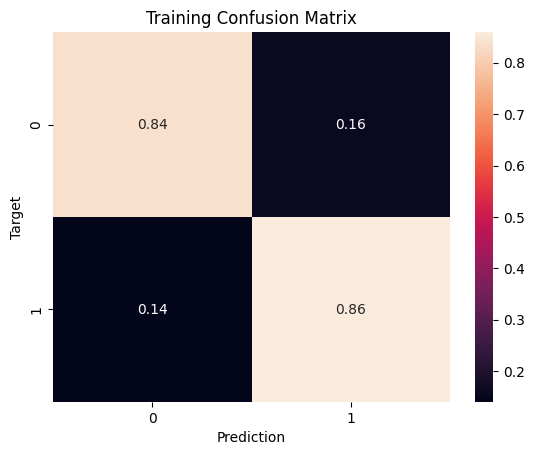

In [260]:
predict_and_plot(X_train, Y_train, model3, 'Training')

Accuracy: 0.79%


array([False,  True,  True, ..., False,  True, False])

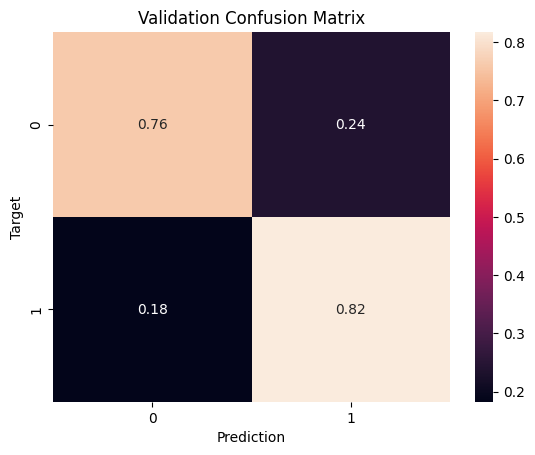

In [264]:
predict_and_plot(X_val, Y_val, model3, 'Validation')